MANISH GAYEN 21161

Machine Learning Project:  Classification of Illegal Fishing

Importing the necessary libraries

In [1]:
#imports

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

Importing the dataset and preprocessing

In [61]:
data=pd.read_csv('illegal_fishing_trn_data.csv')
labels=pd.read_csv('illegal_fishing_trn_class_labels.csv', header=None)
labels.columns = ['index', 'label']

In [62]:
data.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838857.000000,838857.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344641,52.284092,5.946398
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747304,114.404061,7.487147,11.325362
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651


In [63]:
labels.describe()

,label
count,838860.000000
mean,-0.950138
std,0.247370
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,1.000000


In [64]:
#adding labels column to the features dataframe
data['label']=labels['label']
data.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,label
count,8.388600e+05,8.388600e+05,8.388600e+05,8.388600e+05,838857.000000,838857.000000,838860.000000,838860.000000,838860.000000
mean,6.473898e+13,1.424273e+09,2.978600e+04,4.754523e+04,2.297752,183.344641,52.284092,5.946398,-0.950138
std,4.463747e+13,3.866942e+07,6.801536e+04,8.329854e+04,3.747304,114.404061,7.487147,11.325362,0.247370
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769,-1.000000
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655,-1.000000
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779861,4.585558,-1.000000
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943,-1.000000
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651,1.000000


In [65]:
data.columns

Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon', 'label'],
      dtype='object')

In [78]:
value_counts = data['label'].value_counts()
print(value_counts)

label
-1    802828
 0     30237
 1      5795
Name: count, dtype: int64


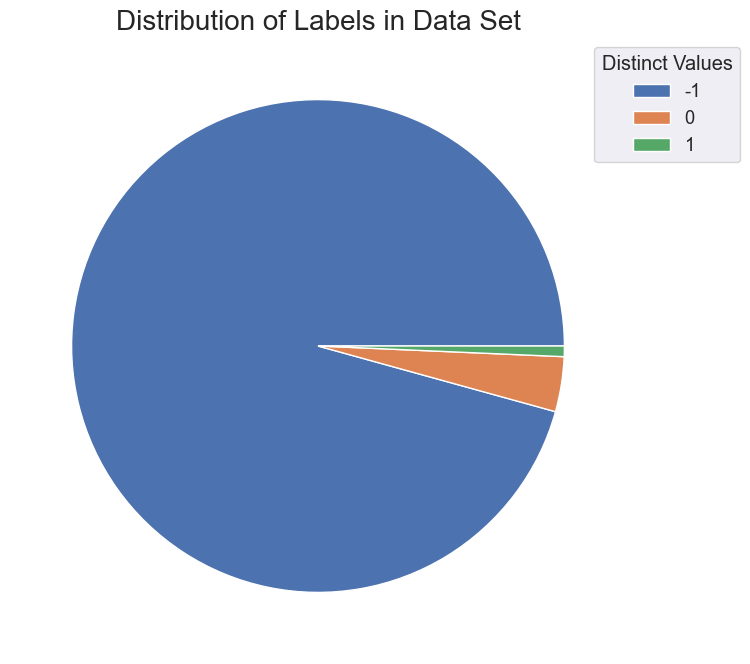

In [76]:
value_counts = data['label'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=None)
plt.title('Distribution of Labels in Data Set', fontsize=20)


plt.legend(labels=value_counts.index, title='Distinct Values', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.show()

In [96]:
data=data.dropna()
data.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,label
count,8.388570e+05,8.388570e+05,8.388570e+05,8.388570e+05,838857.000000,838857.000000,838857.000000,838857.000000,838857.000000
mean,6.473921e+13,1.424273e+09,2.978589e+04,4.754515e+04,2.297752,183.344641,52.284206,5.946482,-0.950138
std,4.463739e+13,3.866944e+07,6.801546e+04,8.329867e+04,3.747304,114.404061,7.486921,11.325295,0.247371
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-83.484398,-167.559769,-1.000000
25%,1.985955e+13,1.394920e+09,0.000000e+00,9.999755e+02,0.000000,75.699997,52.099167,-2.001655,-1.000000
50%,6.960986e+13,1.432542e+09,0.000000e+00,1.004963e+04,0.000000,200.000000,53.779884,4.585558,-1.000000
75%,1.124532e+14,1.456679e+09,4.002401e+04,6.985528e+04,3.100000,283.399994,57.393181,18.418943,-1.000000
max,1.414316e+14,1.480032e+09,2.252376e+06,1.181676e+07,102.300003,405.100006,77.244652,177.426651,1.000000


<Axes: >

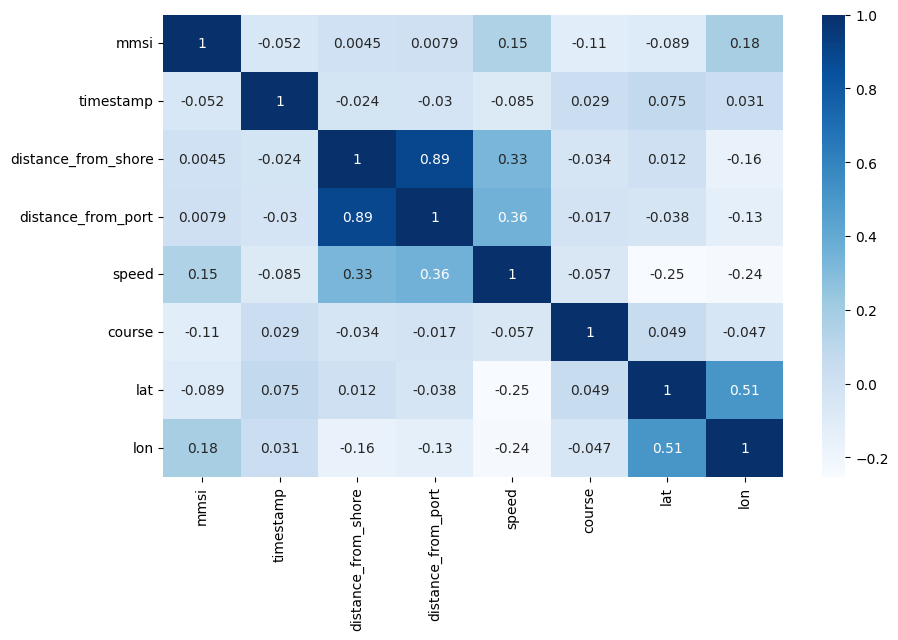

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.drop('label', axis=1).corr(), annot=True, cmap="Blues")

Running the classifers on the entire dataset using GridSearchCV


Training Random Forest...
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 50, 'clf__n_estimators': 75}

Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.98      0.97      0.98      6047
           1       0.88      0.87      0.88      1159

    accuracy                           1.00    167772
   macro avg       0.95      0.95      0.95    167772
weighted avg       1.00      1.00      1.00    167772



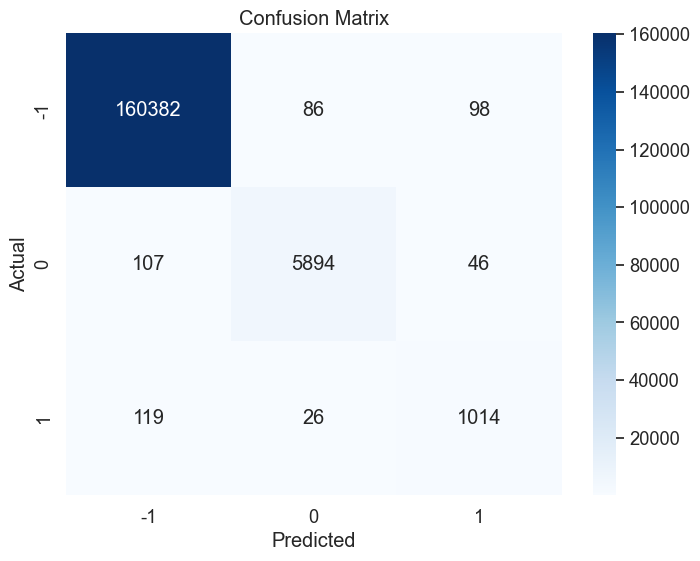


Training KNN...
Best Parameters: {'clf__n_neighbors': 3}

Classification Report for KNN:
              precision    recall  f1-score   support

          -1       0.99      1.00      0.99    160566
           0       0.92      0.90      0.91      6047
           1       0.67      0.58      0.62      1159

    accuracy                           0.99    167772
   macro avg       0.86      0.82      0.84    167772
weighted avg       0.99      0.99      0.99    167772



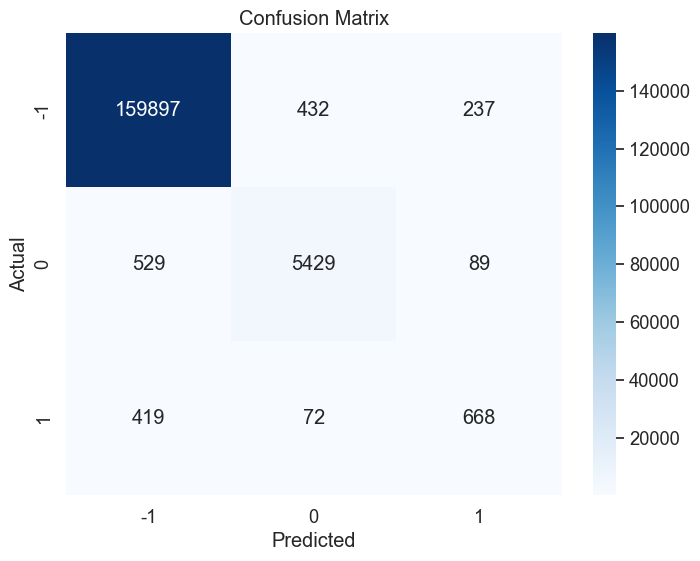


Training Logistic Regression...
Best Parameters: {'clf__C': 1, 'clf__random_state': 0}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98    160566
           0       0.00      0.00      0.00      6047
           1       0.00      0.00      0.00      1159

    accuracy                           0.95    167772
   macro avg       0.32      0.33      0.33    167772
weighted avg       0.92      0.95      0.93    167772



c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

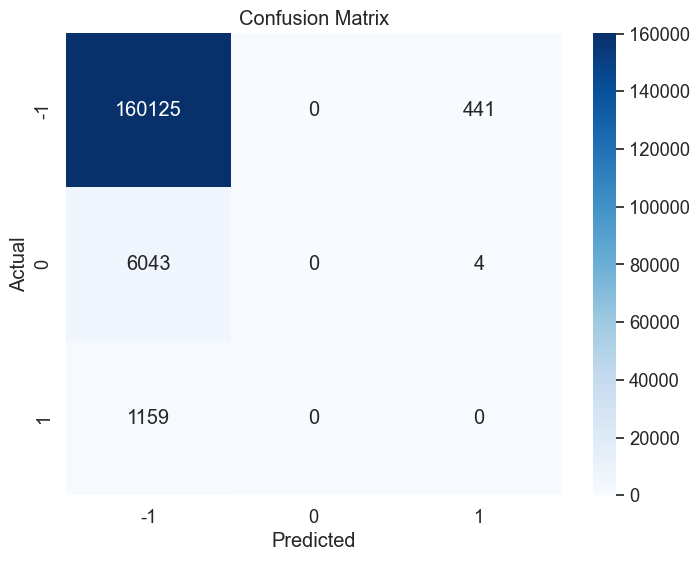


Training Gaussian Naive Bayes...
Best Parameters: {'clf__priors': None}

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

          -1       0.97      0.88      0.92    160566
           0       0.14      0.53      0.22      6047
           1       0.00      0.00      0.00      1159

    accuracy                           0.86    167772
   macro avg       0.37      0.47      0.38    167772
weighted avg       0.94      0.86      0.89    167772



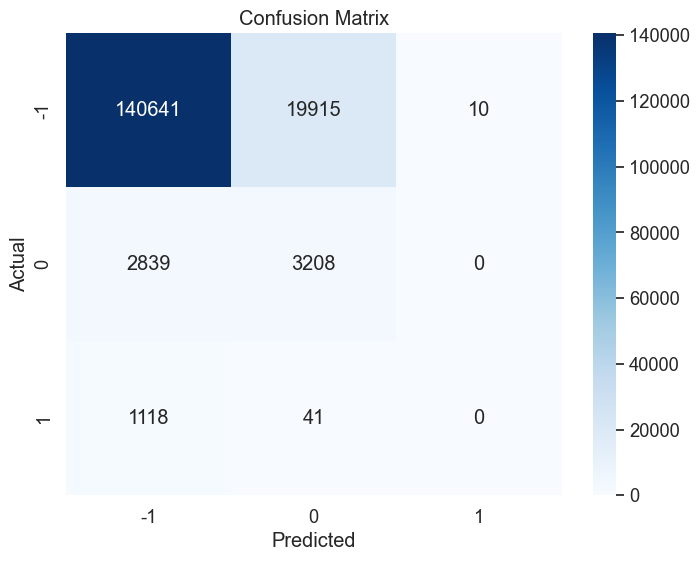


Training Decision Tree...
Best Parameters: {'clf__ccp_alpha': 0.009, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': None}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          -1       1.00      0.94      0.97    160566
           0       0.46      0.83      0.59      6047
           1       0.18      0.96      0.30      1159

    accuracy                           0.93    167772
   macro avg       0.55      0.91      0.62    167772
weighted avg       0.97      0.93      0.95    167772



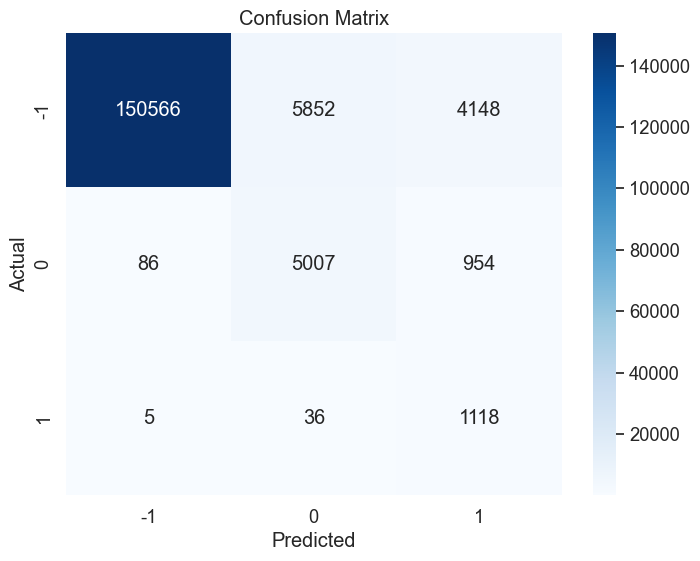


Training AdaBoost...


c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'clf__algorithm': 'SAMME', 'clf__base_estimator': DecisionTreeClassifier(max_depth=50), 'clf__learning_rate': 0.01, 'clf__n_estimators': 50, 'clf__random_state': 0}

Classification Report for AdaBoost:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.97      0.97      0.97      6047
           1       0.85      0.84      0.85      1159

    accuracy                           1.00    167772
   macro avg       0.94      0.94      0.94    167772
weighted avg       1.00      1.00      1.00    167772



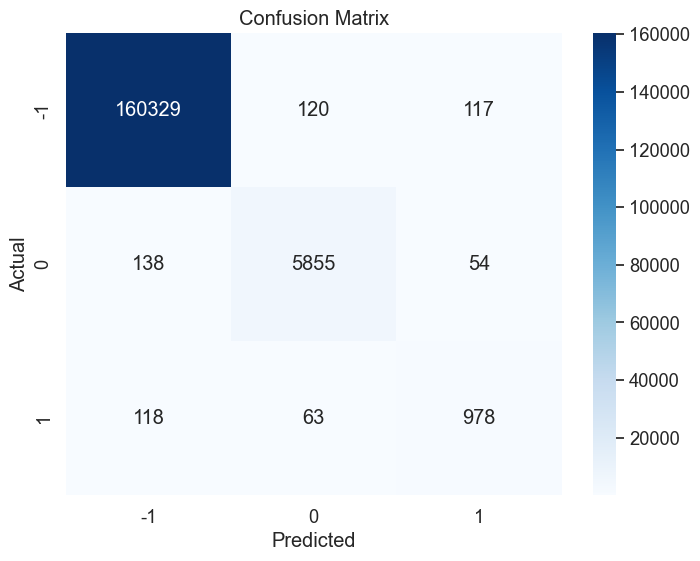

In [29]:
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
be3 = DecisionTreeClassifier(max_depth=50)

# classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(max_features=None,class_weight='balanced',random_state=7),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear',class_weight='balanced'),
    'Gaussian Naive Bayes':  GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=7),
    'AdaBoost': AdaBoostClassifier()
    #'SVM': SVC(class_weight='balanced', probability=True)
}

# making pipeline for each classifier using loop
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),  
        ('clf', clf)
    ])

# parameters for gridsearch
param_grids = {
    'Random Forest': {'clf__criterion':['entropy','gini'], 'clf__n_estimators':[25,50,75,100], 'clf__max_depth':[10,30,50,70]},
    'KNN': {'clf__n_neighbors': [3,5,7]},
    'Logistic Regression': {'clf__C': [0.1, 1, 10], 'clf__random_state':[0,10]},
    'Gaussian Naive Bayes': {'clf__priors': [None]},
    'Decision Tree': {'clf__criterion':['gini', 'entropy'], 'clf__max_features':[None, 'sqrt', 'log2'],'clf__max_depth':[10,40,45,60],'clf__ccp_alpha':[0.009,0.01,0.05,0.1]},
    'AdaBoost': {'clf__algorithm':['SAMME','SAMME.R'],'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1.0],'clf__base_estimator':[be2,be3],'clf__random_state':[0,10]}
    #'SVM': {'clf__C': [0.1, 1, 10], 'clf__kernel': ['linear', 'rbf'], 'clf__gamma': ['scale', 'auto']},
}

# train+test+evaluation
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    
    # Grid search using StratifiedKFold cross-validation
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=7),n_jobs=-1, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    #  best parameters from grid search
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = sorted(data.iloc[:, -1].unique())

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

Plotting information gain graph

Feature Information Gain:
               Feature  Information Gain
1            timestamp          0.099157
6                  lat          0.074393
7                  lon          0.071539
5               course          0.034780
0                 mmsi          0.029033
3   distance_from_port          0.024951
4                speed          0.012788
2  distance_from_shore          0.012390

Selected Features:
['timestamp', 'lat', 'lon']


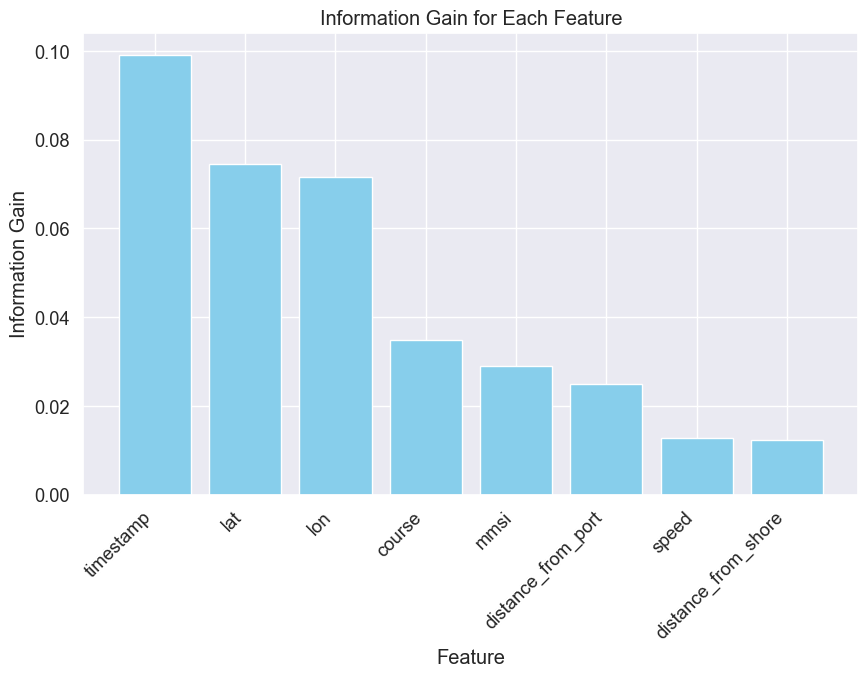

In [38]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

target_column = 'label' 
X = data.drop(columns=[target_column])
y = data[target_column]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# calculating information gain for each feature
info_gain = mutual_info_classif(X_train, y_train)

# dataframe to display feature and their info gain
feature_info_gain = pd.DataFrame({'Feature': X_train.columns, 'Information Gain': info_gain})
feature_info_gain = feature_info_gain.sort_values(by='Information Gain', ascending=False)
print("Feature Information Gain:")
print(feature_info_gain)


k = 3
selected_features = feature_info_gain.head(k)['Feature'].tolist()

print("\nSelected Features:")
print(selected_features)

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(feature_info_gain['Feature'], feature_info_gain['Information Gain'], color='skyblue')
plt.title('Information Gain for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Information Gain')
plt.xticks(rotation=45, ha='right')
plt.show()

Feature selection

In [39]:
#RFE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score


X = data.drop('label', axis=1)
y = data['label']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

# classifier
clf = RandomForestClassifier(n_estimators=75,random_state=7)

kf=StratifiedKFold(n_splits=3, shuffle=True, random_state=7)

# defining feature selector
rfecv = RFECV(estimator=clf, step=1, cv=kf, min_features_to_select=2, n_jobs=-1) 

# fitting into rfecv
rfecv.fit(X_train, y_train)

# selected features
selected_features = np.where(rfecv.support_)[0]
print("Selected Features:", selected_features)

# Transforming data to include only selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# train model on the selected features
clf.fit(X_train_selected, y_train)

# prediction on test set
y_pred = clf.predict(X_test_selected)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Selected Features: [1 7]
Accuracy on Test Set: 0.9970793696206757


In [15]:
data.columns

Index(['mmsi', 'timestamp', 'distance_from_shore', 'distance_from_port',
       'speed', 'course', 'lat', 'lon', 'label'],
      dtype='object')

Running the classifiers using the selected features


Training Random Forest...
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 30, 'clf__n_estimators': 100}

Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.99      0.98      0.98      6047
           1       0.90      0.90      0.90      1159

    accuracy                           1.00    167772
   macro avg       0.96      0.96      0.96    167772
weighted avg       1.00      1.00      1.00    167772



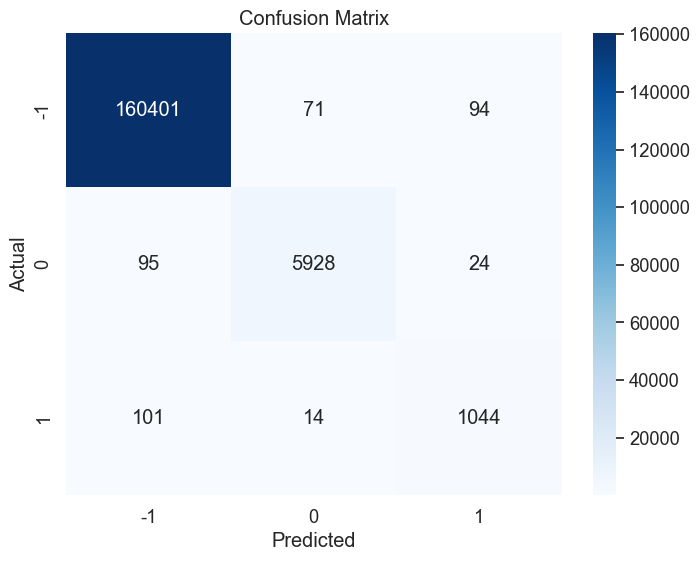


Training KNN...
Best Parameters: {'clf__n_neighbors': 3}

Classification Report for KNN:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.96      0.95      0.95      6047
           1       0.77      0.78      0.78      1159

    accuracy                           0.99    167772
   macro avg       0.91      0.91      0.91    167772
weighted avg       0.99      0.99      0.99    167772



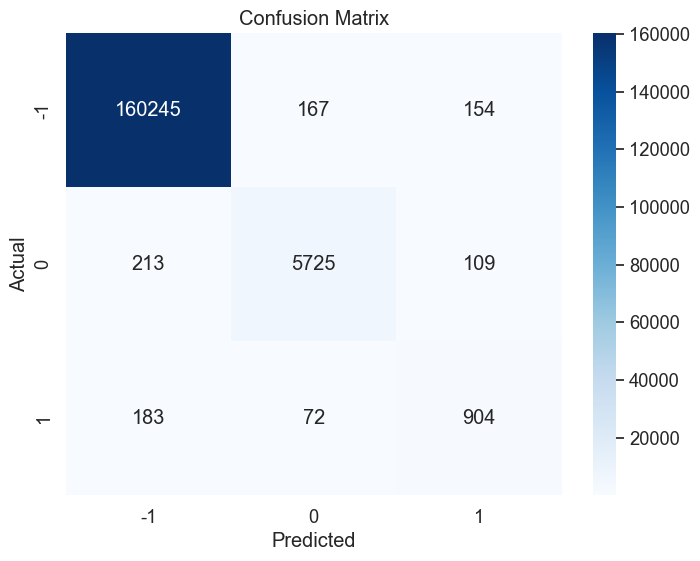


Training Logistic Regression...
Best Parameters: {'clf__C': 0.1, 'clf__random_state': 0}

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98    160566
           0       0.00      0.00      0.00      6047
           1       0.00      0.00      0.00      1159

    accuracy                           0.96    167772
   macro avg       0.32      0.33      0.33    167772
weighted avg       0.92      0.96      0.94    167772



c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

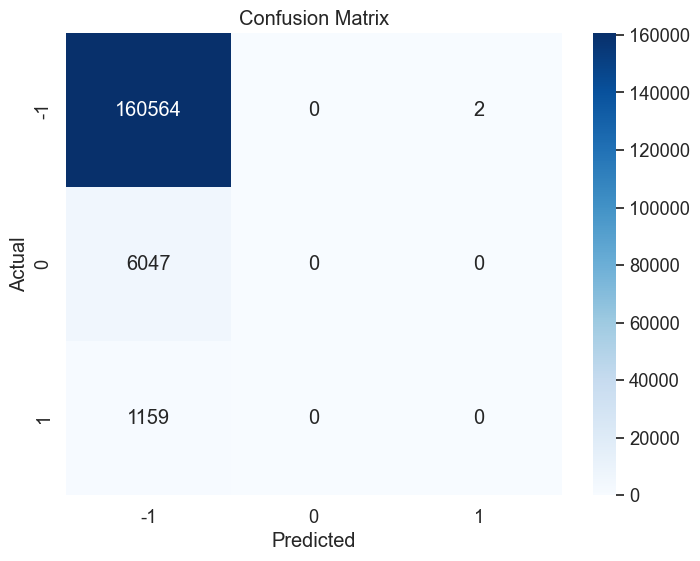


Training Gaussian Naive Bayes...
Best Parameters: {'clf__priors': None}

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98    160566
           0       0.00      0.00      0.00      6047
           1       0.00      0.00      0.00      1159

    accuracy                           0.96    167772
   macro avg       0.32      0.33      0.33    167772
weighted avg       0.92      0.96      0.94    167772



c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

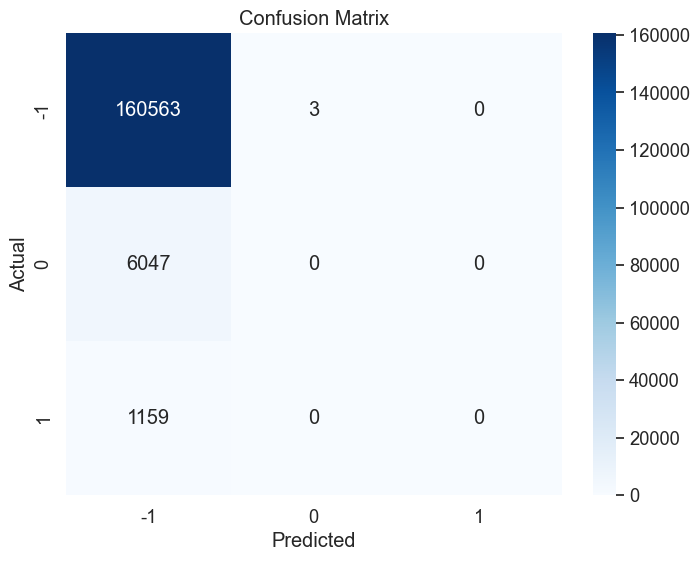


Training Decision Tree...
Best Parameters: {'clf__ccp_alpha': 0.009, 'clf__criterion': 'entropy', 'clf__max_depth': 10, 'clf__max_features': None}

Classification Report for Decision Tree:
              precision    recall  f1-score   support

          -1       1.00      0.95      0.97    160566
           0       0.47      0.86      0.61      6047
           1       0.27      0.90      0.41      1159

    accuracy                           0.95    167772
   macro avg       0.58      0.90      0.67    167772
weighted avg       0.98      0.95      0.96    167772



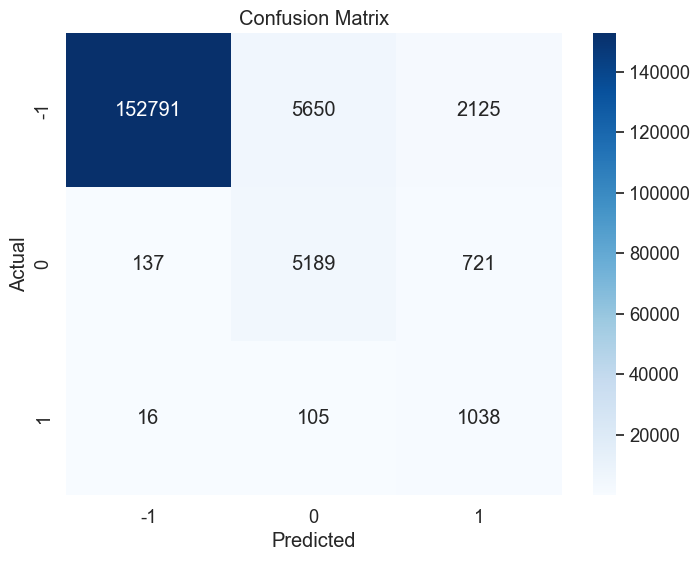


Training AdaBoost...


c:\Users\manij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'clf__algorithm': 'SAMME', 'clf__base_estimator': DecisionTreeClassifier(max_depth=50), 'clf__learning_rate': 0.01, 'clf__n_estimators': 50, 'clf__random_state': 10}

Classification Report for AdaBoost:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.98      0.98      0.98      6047
           1       0.88      0.87      0.88      1159

    accuracy                           1.00    167772
   macro avg       0.95      0.95      0.95    167772
weighted avg       1.00      1.00      1.00    167772



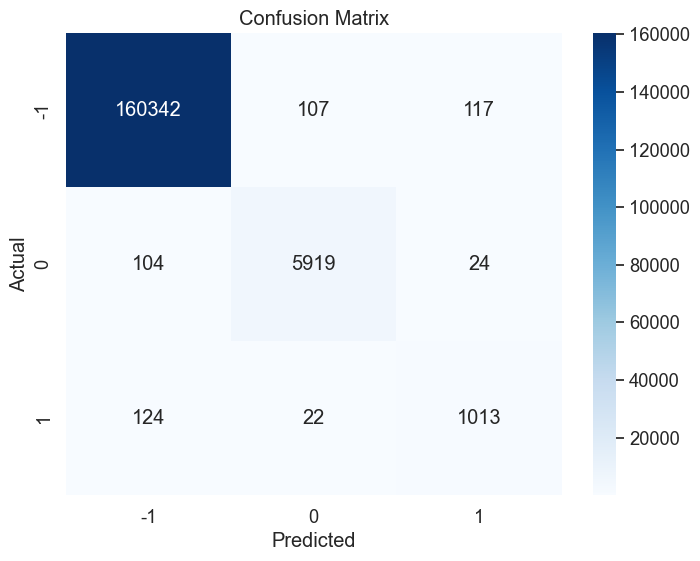

In [43]:
from sklearn.svm import SVC

target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

#be1 = SVC(kernel='linear', class_weight='balanced',probability=True)              
be2 = LogisticRegression(solver='liblinear',class_weight='balanced') 
be3 = DecisionTreeClassifier(max_depth=50)

#classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(max_features=None,class_weight='balanced',random_state=7),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(solver='liblinear',class_weight='balanced'),
    'Gaussian Naive Bayes':  GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=7),
    'AdaBoost': AdaBoostClassifier()
}

# pipeline
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),  
        ('clf', clf)
    ])

# parameters
param_grids = {
    'Random Forest': {'clf__criterion':['entropy','gini'], 'clf__n_estimators':[25,50,75,100], 'clf__max_depth':[10,30,50,70]},
    'KNN': {'clf__n_neighbors': [3,5,7,11,15]},
    'Logistic Regression': {'clf__C': [0.1, 1, 10],'clf__random_state':[0,10]},
    'Gaussian Naive Bayes': {'clf__priors': [None]},
    'Decision Tree': {'clf__criterion':['gini', 'entropy'], 'clf__max_features':[None, 'sqrt', 'log2'],'clf__max_depth':[10,40,45,60],'clf__ccp_alpha':[0.009,0.01,0.05,0.1]},
    'AdaBoost': {'clf__algorithm':['SAMME','SAMME.R'],'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1.0],'clf__base_estimator':[be2,be3],'clf__random_state':[0,10]}
}

# training + test + evaluating
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    
    # Grid search with cross-validation using StratifiedKFold
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=7),n_jobs=-1, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    #  best parameters from grid search
    print(f"Best Parameters: {grid_search.best_params_}")
    
    #  predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    #  classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    #  confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = sorted(data.iloc[:, -1].unique())

#confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    


Training XGBoost...
Best Parameters: {'clf__learning_rate': 1.0, 'clf__max_depth': 5, 'clf__n_estimators': 200}

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    160566
           1       0.78      0.78      0.78      6047
           2       0.56      0.58      0.57      1159

    accuracy                           0.98    167772
   macro avg       0.78      0.78      0.78    167772
weighted avg       0.98      0.98      0.98    167772



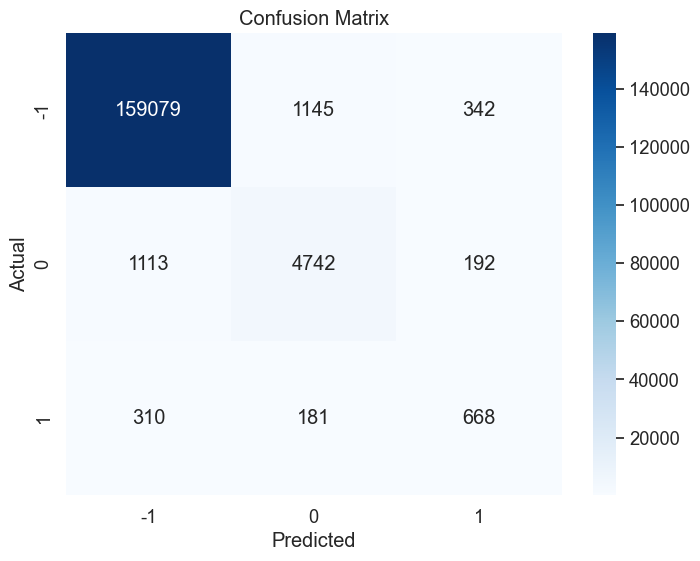

In [57]:
#xgboost + gridsearch
from xgboost import XGBClassifier  
from sklearn.preprocessing import LabelEncoder

target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

# Use LabelEncoder to encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=7, stratify=y_encoded)

# classifiers
classifiers = {'XGBoost': XGBClassifier() }

# pipeline
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([('clf', clf)])

# parameters
param_grids = {'XGBoost' : {'clf__n_estimators': [50, 100, 200], 'clf__learning_rate': [0.01, 0.1, 1.0], 'clf__max_depth': [3, 5, 7]}}

# training + test + evaluating
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    
    # grid search with stratified k-fold cross-validation 
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=7), n_jobs=-1, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    # get the best parameters
    print(f"Best Parameters: {grid_search.best_params_}")
    
    # make predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    # classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = sorted(data.iloc[:, -1].unique())

    # confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


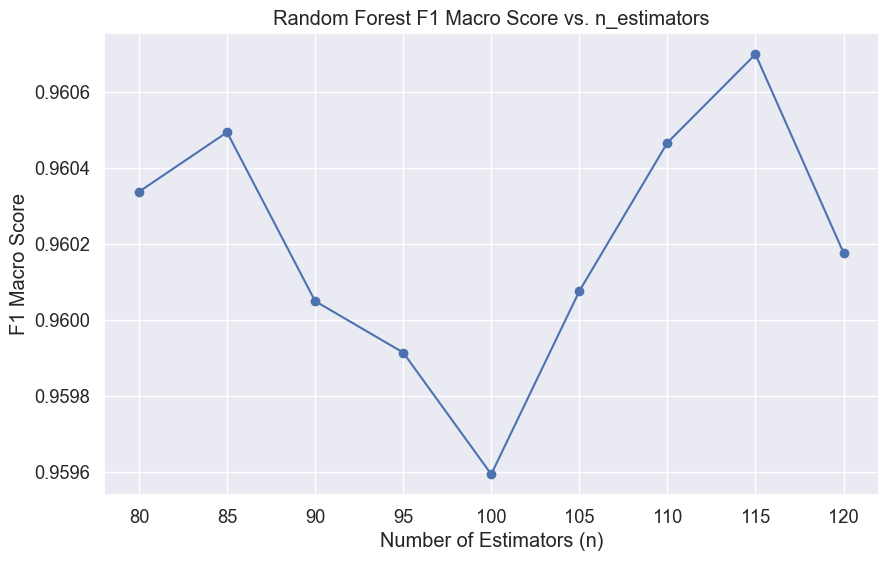

In [44]:
#trying over a range of n_estimators
from sklearn.metrics import f1_score

target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# list of n_estimators to try on
n_values = [ 80,85,90,95,100,105,110,115,120]

# list to store the f1 values
f1_scores = []

# Running random forest for the n_estimator values
for n in n_values:
    # Create and train Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=7, criterion='entropy', n_estimators=n, max_depth=30, max_features=None,class_weight='balanced')
    rf_classifier.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)
    
    # evaluation
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_scores.append(f1_macro)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(n_values, f1_scores, marker='o')
plt.title('Random Forest F1 Macro Score vs. n_estimators')
plt.xlabel('Number of Estimators (n)')
plt.ylabel('F1 Macro Score')
plt.grid(True)
plt.show()


Hyperparameter tuning on the Random Forest Classifier


Training Random Forest...
Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 40, 'clf__n_estimators': 115}

Classification Report for Random Forest:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.99      0.98      0.98      6047
           1       0.90      0.90      0.90      1159

    accuracy                           1.00    167772
   macro avg       0.96      0.96      0.96    167772
weighted avg       1.00      1.00      1.00    167772



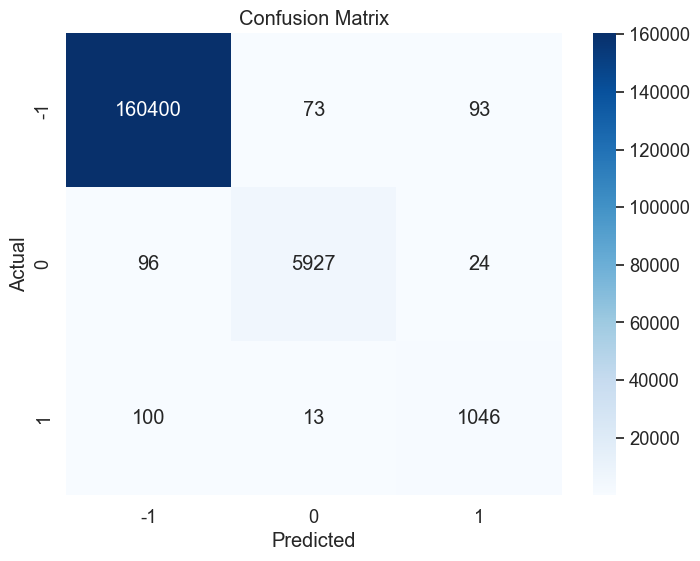

In [58]:
#fine tuning random forest hyperparameters using gridsearch


target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

#classifiers
classifiers = {'Random Forest': RandomForestClassifier(max_features=None,class_weight='balanced',random_state=7)}

# pipeline
pipelines = {}
for name, clf in classifiers.items():
    pipelines[name] = Pipeline([
        ('scaler', StandardScaler()),  
        ('clf', clf)
    ])

# parameters
param_grids = {'Random Forest': {'clf__criterion':['entropy'], 'clf__n_estimators':[100,105,115,120,125,130,135,140,145,150], 'clf__max_depth':[30,35,40,45,50,55,60,65,70]}}

# training + test + evaluating
for name, pipeline in pipelines.items():
    print(f"\nTraining {name}...")
    
    # Grid search with cross-validation using StratifiedKFold
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=7),n_jobs=-1, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    
    #  best parameters from grid search
    print(f"Best Parameters: {grid_search.best_params_}")
    
    #  predictions on the test set
    y_pred = grid_search.predict(X_test)
    
    #  classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    #  confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    class_names = sorted(data.iloc[:, -1].unique())

#confusion matrix heatmap
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    

Loading the test data set and imputing missing values

In [19]:
final_test = pd.read_csv('illegal_fishing_tst_data.csv')
print(final_test.describe)

<bound method NDFrame.describe of                    mmsi   timestamp  distance_from_shore  distance_from_port  \
0        51101297206144  1475317123             0.000000         7070.894531   
1        69609856269322  1463053544             0.000000          999.975464   
2         5145483253513  1407426562          2999.926270         5098.894531   
3        19859547683322  1437585052             0.000000            0.000000   
4        77261928739173  1383037558         60743.878906        76273.945312   
...                 ...         ...                  ...                 ...   
209710  121426486551523  1401451146             0.000000         4242.536621   
209711    1252339803566  1454971102         26171.861328        40248.234375   
209712    1252339803566  1454101136          8543.793945        21023.279297   
209713   77261928739173  1371464346         76835.609375        99997.546875   
209714    1252339803566  1388450945             0.000000            0.000000   

     

In [20]:
final_test.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
count,2.097150e+05,2.097150e+05,2.097150e+05,2.097150e+05,209713.000000,209713.000000,209715.000000,209715.000000
mean,6.474302e+13,1.424330e+09,2.977054e+04,4.745546e+04,2.288837,182.651596,52.282303,5.931114
std,4.466946e+13,3.870784e+07,6.827424e+04,8.913010e+04,3.740228,114.513772,7.473318,11.317319
min,1.252340e+12,1.325380e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-84.980240,-150.730576
25%,1.985955e+13,1.394779e+09,0.000000e+00,9.999755e+02,0.000000,74.599998,52.099167,-2.001673
50%,6.960986e+13,1.432620e+09,0.000000e+00,9.486600e+03,0.000000,199.000000,53.776554,4.584833
75%,1.124532e+14,1.456759e+09,4.031030e+04,6.952527e+04,3.100000,283.000000,57.393166,18.418928
max,1.414316e+14,1.480031e+09,2.323898e+06,1.245220e+07,102.300003,360.000000,83.126915,41.950218


In [21]:
rows_with_nan = final_test[final_test.isna().any(axis=1)]

# Display the rows with NaN values
print(rows_with_nan)

                   mmsi   timestamp  distance_from_shore  distance_from_port  \
106167    1252339803566  1436071311         45176.320312        57068.734375   
169626  121426486551523  1436887700        176633.718750       363046.187500   

        speed  course        lat        lon  
106167    NaN     NaN  23.608601 -16.417601  
169626    NaN     NaN  59.895668  -6.374500  


In [22]:
#imputing missing values

from sklearn.impute import KNNImputer

#defining imputer
knn_imputer = KNNImputer(n_neighbors=7)

# imputing the missing values using knn imputer
imputed_df = pd.DataFrame(knn_imputer.fit_transform(final_test), columns=final_test.columns)

# Display the DataFrame after imputation
print("\nDataFrame after KNN imputation:")
print(imputed_df)


DataFrame after KNN imputation:
                mmsi     timestamp  distance_from_shore  distance_from_port  \
0       5.110130e+13  1.475317e+09             0.000000         7070.894531   
1       6.960986e+13  1.463054e+09             0.000000          999.975464   
2       5.145483e+12  1.407427e+09          2999.926270         5098.894531   
3       1.985955e+13  1.437585e+09             0.000000            0.000000   
4       7.726193e+13  1.383038e+09         60743.878906        76273.945312   
...              ...           ...                  ...                 ...   
209710  1.214265e+14  1.401451e+09             0.000000         4242.536621   
209711  1.252340e+12  1.454971e+09         26171.861328        40248.234375   
209712  1.252340e+12  1.454101e+09          8543.793945        21023.279297   
209713  7.726193e+13  1.371464e+09         76835.609375        99997.546875   
209714  1.252340e+12  1.388451e+09             0.000000            0.000000   

        speed     

In [23]:
imputed_df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon
count,2.097150e+05,2.097150e+05,2.097150e+05,2.097150e+05,209715.000000,209715.000000,209715.000000,209715.000000
mean,6.474302e+13,1.424330e+09,2.977054e+04,4.745546e+04,2.288884,182.651018,52.282303,5.931114
std,4.466946e+13,3.870784e+07,6.827424e+04,8.913010e+04,3.740242,114.513379,7.473318,11.317319
min,1.252340e+12,1.325380e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,-84.980240,-150.730576
25%,1.985955e+13,1.394779e+09,0.000000e+00,9.999755e+02,0.000000,74.599998,52.099167,-2.001673
50%,6.960986e+13,1.432620e+09,0.000000e+00,9.486600e+03,0.000000,199.000000,53.776554,4.584833
75%,1.124532e+14,1.456759e+09,4.031030e+04,6.952527e+04,3.100000,283.000000,57.393166,18.418928
max,1.414316e+14,1.480031e+09,2.323898e+06,1.245220e+07,102.300003,360.000000,83.126915,41.950218


Accuracy on Test Set: 0.9976

Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    160566
           0       0.99      0.98      0.98      6047
           1       0.90      0.90      0.90      1159

    accuracy                           1.00    167772
   macro avg       0.96      0.96      0.96    167772
weighted avg       1.00      1.00      1.00    167772



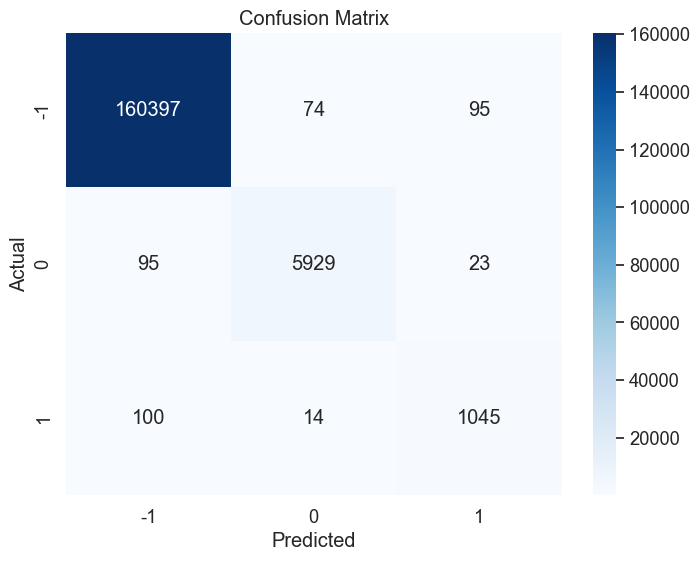

In [97]:
#checking score of best hyperparameters of random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

# best parameters for random forest obtained earlier using gridsearch
rf_params = {'criterion': 'entropy','n_estimators': 115,'max_depth': 40,'random_state': 7,'class_weight': 'balanced', 'max_features': None }

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

# defining classifier
rf_classifier = RandomForestClassifier(**rf_params)
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# results
print(f"Accuracy on Test Set: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_rep)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Training random forest using best parameters on the entire train dataset and then predicting the labels of test set

In [108]:
#training the final model on the entire dataset

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


target_column = 'label' 
selected_columns = ['timestamp', 'lon']

X = data[selected_columns]
y = data[target_column]

final_features = imputed_df[selected_columns]

# best parameters for random forest obtained earlier using gridsearch
rf_params = {'criterion': 'entropy','n_estimators': 115,'max_depth': 40,'random_state': 7,'class_weight': 'balanced', 'max_features': None }


# defining classifier
final_classifier = RandomForestClassifier(**rf_params)
final_classifier.fit(X, y)

# Making predictions
final_labels = rf_classifier.predict(final_features)
print(final_labels)


[-1 -1 -1 ... -1 -1 -1]


In [110]:
#function to write predicted labels into txt file

def write_list_to_file(values, file_path):
    with open(file_path, 'w') as file:
        for value in values:
            file.write(str(value) + '\n')


my_list = final_labels
file_path = 'labels.txt'

write_list_to_file(my_list, file_path)


In [109]:
len(final_labels)

209715